In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import scipy.optimize as spo

# Optimizers

## What is an optimizer?
An optimizer is an algorithm that can:

  1. find minimum values of functions
  2. build parameterized models based on data
  3. refine allocations to stocks in portfolio

## How do I use optimizer?
3 key steps in using optimizers:

  1. Provide a function to minimize
  2. Provide an initial guess
   - don't know best guess? just provide something random and optimzer will figure out correct for you anyway
  3. call the optimizer

In [2]:
def f(x):
    y = (x - 1.5)**2 + 0.5
    print(f"x = {x}, y = {y}")
    return y

x = [2.], y = [0.75]
x = [2.], y = [0.75]
x = [2.00000001], y = [0.75000001]
x = [0.99999999], y = [0.75000001]
x = [1.5], y = [0.5]
x = [1.5], y = [0.5]
x = [1.50000001], y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minimum found at X = [1.5], Y = 0.5
x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


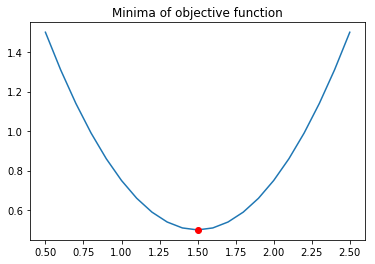

In [3]:
xguess = 2.0 # initial guess where we think function is minimum: x value
min_result = spo.minimize(f, xguess, method='SLSQP', options={'disp': True}) # disp is verbose
print(f"Minimum found at X = {min_result.x}, Y = {min_result.fun}")

xplot = np.linspace(0.5, 2.5, 21) # generate 21 values between 0.5 & 2.5 to be used as x value
yplot = f(xplot) # compute y for given x
plt.plot(xplot, yplot) # plot x & y
plt.plot(min_result.x, min_result.fun, 'ro')  # plot the minimizer result on top of function plot
plt.title("Minima of objective function")
plt.show()

# Convex Problems
- choose two points & draw line
- convex problem if line is above graph

- Convex problem has one global minima

# Building a parameterized model

- simple paramterized model: f(x) = mx + b; m & b are the parameters to this function
- instead of m we will use c0 and for b we will use c1

### f(x) = c<sub>0</sub>x+c<sub>1</sub>


## Fit a line to given data points

- minimizer will try various values for coefficients - c<sub>o</sub> & c<sub>1</sub>
  - we will have to give initial guess
- To the minimizer we will need to tell to minimize something; the thing that we want do do is find best fit of line and therefore we will define a error function and give that to minimizer as the thing that we want to minimize
- Minimizer will compute some coefficient and using our error function can tell how good of a fit it was; it will iterate to compute some more coefficient and eventually settle for coefficient value that minimizes the error function



In [4]:
# our goal is to minimize error which is given by error function

def error(line, data):
    """Computer error between given line model and observed data
    
    Parameters
    ----------
    line: line is just coefficients (and that is all we need to describe line); the data type of line can be tuple/list/array ((C0, C1) where C0 is slope and C1 is Y-intercept; 
    data: 2D array where each row is a point (x, y); we want to evaluate the line for this data
    
    Returns error as a single real value.
    """
    slope, intercept = line
    actual_x = data[:, 0]
    actual_y = data[:, 1]
    fitted_y = slope * actual_x + intercept
    error = (actual_y - fitted_y)**2
    err = np.sum(error)
    return err  # notice that the error is single value!

In [5]:
def fit_line(data, error_func):
    """Fit a line to given data, using a supplied error function.

    Parameters
    ----------
    data: 2D array where each row is a point (X, Y)
    error_func: function that computes the error between a line and observed data

    Returns line that minimizes the error function.
    """

    # generate initial guess for the line model: slope = 0 & y-intercept = mean of y
    l = np.float32([0, np.mean(data[:, 1])])

    # plot initial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, l[0] * x_ends + l[1], 'k--', linewidth=3.0, label='Initial Guess')
    
    # call optimizer to minimize error function
    # the args in here is how we pass data to our error function
    # from sicpy docs: args is "Extra arguments passed to the objective function and its derivatives"
    result = spo.minimize(error_func, l, args=(data,), method='SLSQP', options={'disp': True}) # disp means Verbose!
    return result.x

In [6]:
# Transpose is used in next section of code; lets see what it buys us first!
# Eg of what Transpose can do. Suppose I want to pair element from these two array
# simply creating an array just makes np array; but If transpose it I will have paired them!
simple = np.asarray([[1,2,3], [4,5,6]])
transposed = simple.T
print(simple)
print(transposed) # see how tranpose pairs the data!
print(f"x values: {transposed[:,0]}")
print(f"y values: {transposed[:,1]}")

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]
x values: [1 2 3]
y values: [4 5 6]


Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 171.43004426499039
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line (Minimizer Answer): C0 = 4.124753036854993, C1 = 1.3013137899222265


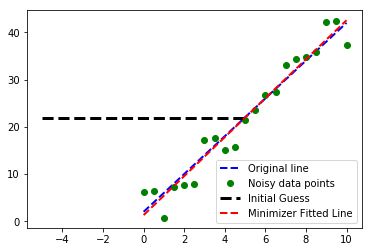

In [7]:
# here is our line and only we know about it; its slope is 4 & y-intercept is 2
l_orig = np.float32([4,2])  
print(f"Original line: C0 = {l_orig[0]}, C1 = {l_orig[1]}")
Xorig = np.linspace(0, 10, 21) # generate 21 values for X
Yorig = l_orig[0] * Xorig + l_orig[1] # compute Y for our equation of line using x
plt.plot(Xorig, Yorig, 'b--', linewidth = 2.0, label = "Original line") # lets see our line!

# generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape) # Par
y_modified = Yorig + noise
data = np.asarray([Xorig, y_modified]).T   # pair the X & Y by taking transpose
plt.plot(data[:, 0 ], data[:, 1], 'go', label='Noisy data points') # plot our noisy data

# so far I have a line and plot for it; I generated a noisy data based on my original line
# now let's see if minimizer can recover my original line from noisy line
# we are also plotting to see our original line, noisy data points, some guess & finally result of minimizer

# lets do this to fit a line
# all that work is now done by the code fit_line which returns minimizers best guess for line
l_fit = fit_line(data, error)
print ("Fitted line (Minimizer Answer): C0 = {}, C1 = {}".format(l_fit[0], l_fit[1]) )
plt.plot(data[:, 0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth=2.0, label = "Minimizer Fitted Line")
plt.legend(loc=4)

# Fitting a polynomial

Can even fit more complicated things then just a line!

Let's fit polynomial then just some line

In [8]:
def err_poly(c, data):
    """Computer error between given polynomial and observed data

    Parameters
    ----------
    c: numpy.poly1d object or equivalent array representing polynomial coefficients
    data: 2D array where each row is a point (x,y)

    Returns error as a single real value
    """
    # Metric: Sum of squared Y-axis differences
    actual_x = data[:, 0]
    actual_y = data[:, 1]
    guess_y = np.polyval(c, actual_x)
    err = np.sum( (actual_y - guess_y) ** 2 )
    return err

def fit_poly(data, error_func, degree=3):
    """Fit a polynomial to given data, using supplied error function
    
    Parameters
    ----------

    data: 2D array where each row is a point (x, y)
    error_func: function that computes the error between a polynomial and observed data
    
    Returns polynomial that minimized the error function
    """

    initial_polynomial_coefficient_guess = np.poly1d(np.ones(degree + 1,  dtype=np.float32))
    print("initial guess")
    print(initial_polynomial_coefficient_guess)

    # plot of initial guess
    guess_x = np.linspace(-5, 5, 21)
    guess_y = np.polyval(initial_polynomial_coefficient_guess, guess_x)
    plt.plot(guess_x, guess_y, 'k--', linewidth=2.0, label="Initial guess")

    # now tell the machine to optimize for our error function
    result = spo.minimize(error_func, initial_polynomial_coefficient_guess, args=(data,), method='SLSQP', options={'disp': True})
    return np.poly1d(result.x) # convert optimal result into a poly1d object and return it

Original polynomial:
      4      3     2
1.5 x - 10 x - 5 x + 60 x + 50
initial guess
   4     3     2
1 x + 1 x + 1 x + 1 x + 1
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 19120.218426123618
            Iterations: 7
            Function evaluations: 71
            Gradient evaluations: 7
Fitted polynomial:
        4         3         2
1.476 x - 10.01 x - 3.862 x + 61.45 x + 46.22


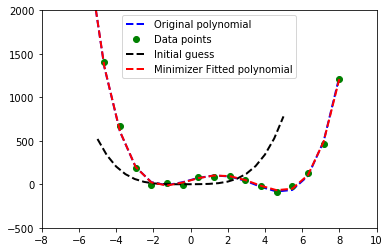

In [9]:
# define a original polynomial

polynomial = np.poly1d([1.5, -10, -5, 60, 50]) 
print(f"Original polynomial:\n {polynomial}")
x_orig = np.linspace(-8, 8, 20) # gives linearly spaced 21 points between 0 & 10
y_orig = np.polyval(polynomial, x_orig)
plt.plot(x_orig, y_orig, 'b--', linewidth = 2.0, label = "Original polynomial")
plt.xlim(-8, 10)
plt.ylim(-500, 2000)


# now lets generate some noise to our data
noise_sigma = 30.0
noise_y = np.random.normal(2, noise_sigma, y_orig.shape)
y_modified = y_orig + noise_y
data = np.asarray([x_orig, y_modified]).T
plt.plot(data[:, 0 ], data[:, 1], 'go', label='Data points')

# now give machine the work!
fitted_polynomial = fit_poly(data, err_poly, 4)
print(f"Fitted polynomial:\n {fitted_polynomial}")
fitted_y = np.polyval(fitted_polynomial, x_orig)
plt.plot(x_orig, fitted_y, 'r--', linewidth=2.0, label="Minimizer Fitted polynomial")

plt.legend(loc=0)


## Accessing coefficient by index can be surprising

## use ployval to be accurate!

In [10]:
fitted_polynomial

poly1d([  1.47570008, -10.01104717,  -3.86154138,  61.45014499,
        46.21741026])

In [11]:
print(fitted_polynomial)

       4         3         2
1.476 x - 10.01 x - 3.862 x + 61.45 x + 46.22


In [12]:
fitted_polynomial[0]  # 0 is last coefficient!

46.21741025692994

In [13]:
fitted_polynomial[4] # this is coefficient for higher order term

1.4757000759631496